CHapter 5: Play with filter design -- Freq domain design with rectangular window, hanning window, then chebyshev, etc

In [1]:
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

Text(0.5,1,'Shifted Frequency Domain of Desired Response')

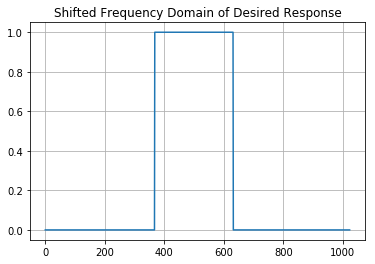

In [53]:
# we will use N=1024 points
N=1024
sig_fft = np.zeros(N)
sig_fft[0:120] = 1
sig_fft[1000-120:]= 1
plt.plot(fftpack.fftshift(sig_fft))
sig_time = fftpack.ifft(sig_fft)
plt.grid(True)
plt.title('Shifted Frequency Domain of Desired Response')

C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Time Domain, IFFT of above')

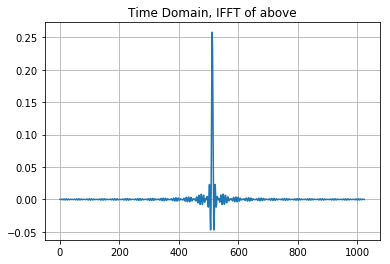

In [54]:
plt.plot(fftpack.fftshift(sig_time))
plt.grid(True)
plt.title('Time Domain, IFFT of above')

In [59]:
w, h = signal.freqz(fftpack.fftshift(sig_time))

Text(0.5,1,'Freqz response')

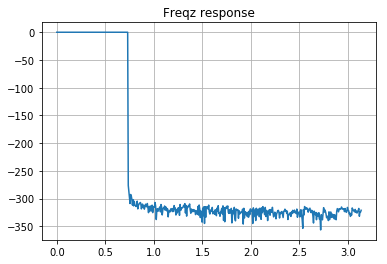

In [60]:
plt.plot(w,20*np.log10(abs(h)))
plt.grid(True)
plt.title('Freqz response')

Let's take the sync response and take a reasonable amount of coefficients, and watch what happens

C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Filter Coefficients')

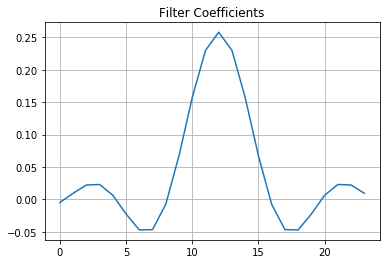

In [63]:
sig_shifted = fftpack.fftshift(sig_time)
sig_rect_window = sig_shifted[500:524]
plt.plot(sig_rect_window)
sig_rect_window_time = fftpack.fftshift(sig_rect_window)
plt.grid(True)
plt.title('Filter Coefficients')

Text(0.5,1,'Rectangular Window Response')

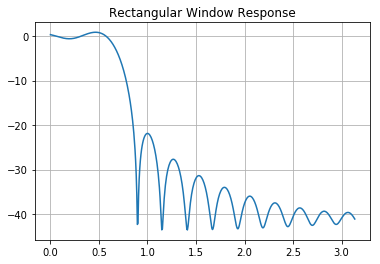

In [64]:
w,h=signal.freqz(sig_rect_window)
plt.plot(w,20*np.log10(abs(h)))
plt.grid(True)
plt.title('Rectangular Window Response')

Let's create a hamming window and repeat the experiement

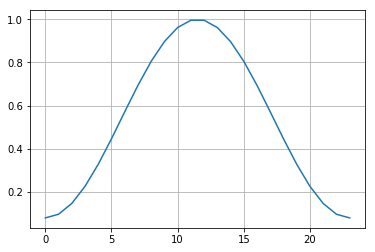

In [68]:
hamming_win = np.hamming(24)
plt.plot(hamming_win)
plt.grid(True)


In [69]:
coeffs_windows = sig_rect_window * hamming_win

Text(0.5,1,'Hamming window response')

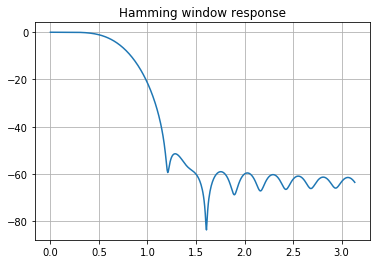

In [71]:
w,h=signal.freqz(coeffs_windows)
plt.plot(w, 20*np.log10(abs(h)))
plt.grid(True)
plt.title('Hamming window response')

All together now

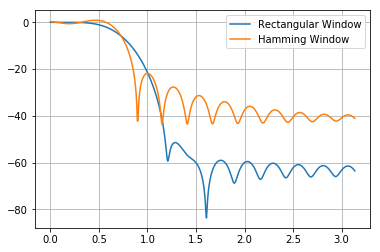

In [74]:
w1,h1=signal.freqz(coeffs_windows)
w2,h2=signal.freqz(sig_rect_window)
plt.plot(w1, 20*np.log10(abs(h1)),label='Rectangular Window')
plt.plot(w2, 20*np.log10(abs(h2)),label='Hamming Window')
plt.grid(True)
plt.legend()